In [1]:
import skimage
import os
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.color import rgb2hsv
import re
import numpy as np
import seaborn as sns
import scipy.signal as sg
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.decomposition import SparsePCA
import pywt
from scipy import stats
import timeit
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
import pandas as pd
from datetime import datetime
import pytz
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from skimage import io
from patchify import patchify, unpatchify
%matplotlib inline
from sklearn.calibration import CalibrationDisplay
import collections

import numpy as np

import scipy.signal as signal
import scipy.special as special
import scipy.optimize as optimize

import matplotlib.pyplot as plt

import skimage.io
import skimage.transform

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

import dtreeviz 
import pickle
import keras


2024-02-02 10:08:19.489969: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# fog_aware_pivot = pd.read_csv('fog_aware_stats_4_equal_patches_pivot.csv')
# fog_aware_pivot = pd.read_csv('/home/smmrrr/Fog_Imaging_Project/STA_221_project_code/analyses_files/fog_aware_stats_horizontal_3_patches_pivot.csv')
fog_aware_pivot = pd.read_csv('/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/datasets/fog_aware_stats_new_labels.csv')
fog_aware_pivot

,photo,Label_new,Label,site,hour,mscn_var_0,mscn_var_1,mscn_var_2,vertical_var_0,vertical_var_1,...,dark_channel_prior_0,dark_channel_prior_1,dark_channel_prior_2,color_sat_0,color_sat_1,color_sat_2,CF_0,CF_1,CF_2,Label_train
0,2022_07-04.0000_agatebeachor.jpg,not_foggy,not_foggy,Agate Beach,0,0.220805,0.285012,0.099900,0.065638,0.106588,...,28.0,6.0,14.0,0.000000,0.000000,0.000000,85.593872,51.769043,10.103722,0
1,2022_07-04.0000_otterrockor.jpg,not_foggy,not_foggy,Otter Rock,0,0.725298,0.720047,0.691137,0.493167,0.477681,...,2.0,4.0,0.0,0.244513,0.152914,0.160079,90.752732,158.670973,166.963307,0
2,2022_07-04.0700_agatebeachor.jpg,not_foggy,not_foggy,Agate Beach,7,0.096299,0.131353,0.173731,0.015461,0.041110,...,64.0,24.0,37.0,0.000000,0.000000,0.000000,35.000917,18.467704,9.174465,0
3,2022_07-04.0730_agatebeachor.jpg,not_foggy,not_foggy,Agate Beach,7,0.101561,0.205493,0.325304,0.016175,0.091502,...,95.0,13.0,20.0,0.063917,0.072188,0.164992,105.608782,106.996344,147.341268,0
4,2022_07-04.0730_otterrockor.jpg,not_foggy,not_foggy,Otter Rock,7,0.251876,0.576411,0.588961,0.082378,0.292454,...,7.0,0.0,0.0,0.099916,0.042100,0.124894,110.066753,189.517876,183.865692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,2023_09-30.1900_agatebeachor.jpg,not_foggy,not_foggy,Agate Beach,19,0.176457,0.743293,0.523022,0.083535,0.457137,...,70.0,0.0,0.0,0.041942,0.085205,0.077075,182.964334,69.402653,135.332656,0
7992,2023_09-30.1930_cannonbeach.jpg,not_foggy,not_foggy,Cannon Beach,19,0.164592,0.585149,0.640644,0.042335,0.314184,...,0.0,0.0,0.0,0.039959,0.058892,0.092489,137.364165,106.650678,174.568957,0
7993,2023_09-30.2000_otterrockor.jpg,not_foggy,not_foggy,Otter Rock,20,0.282921,0.442290,0.345411,0.136875,0.235093,...,22.0,3.0,0.0,0.125098,0.145597,0.143351,176.593142,127.302494,142.248589,0
7994,2023_09-30.2030_otterrockor.jpg,not_foggy,not_foggy,Otter Rock,20,0.193967,0.582705,0.378667,0.059283,0.307785,...,26.0,0.0,0.0,0.137039,0.243238,0.247271,175.215470,145.617058,152.212567,0


In [3]:
X = np.array(fog_aware_pivot.drop(['photo', 'Label_new', 'Label', 'site', 'hour', 'Label_train'], axis = 1)
            )

y = fog_aware_pivot['Label_train']

In [4]:
####create a 50/50 dataset of foggy not foggy
# X_balanced, y_balanced, sample_i = balance_dataset(X, y)


###scale the data
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

    # ####train test split
    # X_train = X_scaled[train_index]
    # X_test = X_scaled[test_index]
    # y_train = y[train_index]
    # y_test = y[test_index]

X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(
        X_scaled, y, np.arange(len(X_scaled)), test_size=0.20
    # , random_state=42
    , stratify = y)


In [5]:
# load the model from disk
logistic_model = pickle.load(open('/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/models/logistic_model.sav', 'rb'))
logistic_model
result = logistic_model.score(X_test, y_test)
print(result)

# Make predictions on the test set
y_test_pred = logistic_model.predict(X_test)


# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)


0.964375
Accuracy: 0.964375
Precision: 0.9055555555555556
Recall: 0.8029556650246306
F1 Score: 0.8511749347258485
AUC-ROC Score: 0.9862266432996817


In [6]:
# load the model from disk
random_forest_model = pickle.load(open('/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/models/random_forest_model.sav', 'rb'))
result = random_forest_model.score(X_test, y_test)
print(result)

# Make predictions on the test set
y_test_pred = random_forest_model.predict(X_test)


# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)


0.98375
Accuracy: 0.98375
Precision: 0.9732620320855615
Recall: 0.896551724137931
F1 Score: 0.9333333333333335
AUC-ROC Score: 0.9926249422583933


In [7]:
all_photos = pd.concat([
pd.read_csv('/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/datasets/fog_aware_stats_horizontal_3_patches.csv')
,pd.read_csv('/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/datasets/fog_aware_stats_horizontal_3_patches_18000_19000.csv')
,pd.read_csv('/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/datasets/fog_aware_stats_horizontal_3_patches_reboot.csv')
,pd.read_csv('/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/datasets/fog_aware_stats_horizontal_3_patches_reboot2.csv')

], axis = 0)

all_photos = all_photos.drop(['Unnamed: 0'],axis = 1)
# all_photos



In [8]:
print(len(all_photos))
all_photos=all_photos.drop_duplicates()

68496


In [9]:
image_files_summary = pd.read_csv('/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/datasets/unlabeled_photos_for_model.csv')
all_photos=all_photos.merge(image_files_summary[['photo', 'Label', 'site', 'hour_pst' ]]
                          , on = 'photo')


In [10]:
all_photos['patch'] = all_photos['patch'].astype(str)
all_photos_pivot = all_photos.pivot(
index = ['photo', 'Label', 'site', 'hour_pst']
    ,columns = ['patch']
    , values = [ 'mscn_var', 'vertical_var', 'sharpness',
       'coef_or_var_sharpness', 'rms_contrast', 'entropy', 'dark_channel_prior',
       'color_sat', 'CF']
)
all_photos_pivot.columns = all_photos_pivot.columns.map('_'.join)
all_photos_pivot=all_photos_pivot.reset_index()
print(all_photos_pivot.columns)

# fog_aware3_pivot.dropna().to_csv('fog_aware_stats_horizontal_3_patches_pivot.csv', index=False)



Index(['photo', 'Label', 'site', 'hour_pst', 'mscn_var_0', 'mscn_var_1',
       'mscn_var_2', 'vertical_var_0', 'vertical_var_1', 'vertical_var_2',
       'sharpness_0', 'sharpness_1', 'sharpness_2', 'coef_or_var_sharpness_0',
       'coef_or_var_sharpness_1', 'coef_or_var_sharpness_2', 'rms_contrast_0',
       'rms_contrast_1', 'rms_contrast_2', 'entropy_0', 'entropy_1',
       'entropy_2', 'dark_channel_prior_0', 'dark_channel_prior_1',
       'dark_channel_prior_2', 'color_sat_0', 'color_sat_1', 'color_sat_2',
       'CF_0', 'CF_1', 'CF_2'],
      dtype='object')


In [12]:
fog_aware_pivot.describe()

,hour,mscn_var_0,mscn_var_1,mscn_var_2,vertical_var_0,vertical_var_1,vertical_var_2,sharpness_0,sharpness_1,sharpness_2,...,dark_channel_prior_0,dark_channel_prior_1,dark_channel_prior_2,color_sat_0,color_sat_1,color_sat_2,CF_0,CF_1,CF_2,Label_train
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,14.862806,0.175000,0.463616,0.528967,0.068883,0.262772,0.341524,0.010569,0.031945,0.036596,...,54.595673,16.466608,8.265383,0.113423,0.113568,0.206798,104.127422,118.473756,137.969236,0.126938
std,4.372415,0.111553,0.212237,0.202011,0.069255,0.151973,0.174733,0.006907,0.020492,0.021075,...,42.196138,27.292968,17.630297,0.096747,0.099156,0.152032,42.103278,41.006924,37.683691,0.332925
min,0.000000,0.020626,0.021114,0.026509,0.007721,0.007765,0.007934,0.002663,0.002935,0.002815,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.090652,0.285243,0.403082,0.020546,0.120140,0.208189,0.006094,0.013487,0.019528,...,13.000000,0.000000,0.000000,0.048033,0.048504,0.098696,75.221621,84.606695,124.409026,0.000000
50%,15.000000,0.144261,0.510484,0.567017,0.037393,0.283633,0.351700,0.007555,0.030088,0.034792,...,52.000000,0.000000,0.000000,0.086372,0.084207,0.160339,90.153093,115.991081,147.882084,0.000000
75%,19.000000,0.239105,0.632869,0.692844,0.099564,0.384483,0.485876,0.012961,0.045934,0.051278,...,93.000000,23.000000,6.000000,0.144089,0.141387,0.261093,140.015270,155.672935,165.622377,0.000000
max,23.000000,0.784885,0.872326,0.865994,0.604997,0.647252,0.717636,0.066097,0.121406,0.118283,...,150.000000,123.000000,112.000000,0.647816,0.697465,0.766886,189.406545,191.282717,190.167628,1.000000


In [13]:
all_photos_pivot.describe()

,hour_pst,mscn_var_0,mscn_var_1,mscn_var_2,vertical_var_0,vertical_var_1,vertical_var_2,sharpness_0,sharpness_1,sharpness_2,...,entropy_2,dark_channel_prior_0,dark_channel_prior_1,dark_channel_prior_2,color_sat_0,color_sat_1,color_sat_2,CF_0,CF_1,CF_2
count,22831.000000,22831.000000,22831.000000,22831.000000,22831.000000,22831.000000,22831.000000,22831.000000,22831.000000,22831.000000,...,22831.000000,22831.000000,22831.000000,22831.000000,22831.000000,22831.000000,22831.000000,22831.000000,22831.000000,22831.000000
mean,12.993036,0.165836,0.460987,0.539543,0.063881,0.261597,0.353748,0.010341,0.031417,0.037278,...,3.664902,53.915422,16.743726,7.746923,0.115835,0.119152,0.218832,102.429732,119.703416,138.805274
std,3.744044,0.102975,0.205350,0.199618,0.064375,0.147298,0.172421,0.006939,0.019402,0.020593,...,0.400009,42.213356,27.075318,17.475005,0.100681,0.103933,0.159097,42.541579,40.657865,36.215673
min,7.000000,0.016630,0.020422,0.024540,0.006911,0.006299,0.006687,0.001065,0.000917,0.001030,...,1.555545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.088445,0.302350,0.426777,0.020024,0.133156,0.229526,0.006046,0.014733,0.021029,...,3.447878,12.000000,0.000000,0.000000,0.050084,0.052151,0.105907,72.983645,85.106140,124.883672
50%,13.000000,0.134362,0.514271,0.580207,0.034028,0.285546,0.368382,0.007320,0.030328,0.035762,...,3.730262,50.000000,1.000000,0.000000,0.088235,0.087990,0.168168,88.802798,116.926995,147.024332
75%,16.000000,0.229162,0.618435,0.699696,0.091209,0.371671,0.493231,0.012473,0.043959,0.052018,...,3.949656,93.000000,23.000000,4.000000,0.143112,0.145611,0.272111,136.919270,157.692040,166.484042
max,19.000000,0.779563,0.867967,0.880180,0.592262,0.644028,0.728385,0.069633,0.121669,0.119001,...,4.517003,147.000000,124.000000,108.000000,0.708086,0.755902,0.982977,189.996838,191.241281,190.529915


In [11]:

all_photos_pivot = pd.concat([all_photos_pivot,fog_aware_pivot ], axis = 0)
# fog_aware_pivot['Label_train'] = 1*(fog_aware_pivot['Label']=='foggy')


In [12]:
# all_photos_pivot = all_photos_pivot.reset_index()
all_photos_pivot.loc[all_photos_pivot['Label_new']=='foggy', 'Label_train'] = 1
all_photos_pivot.loc[all_photos_pivot['Label_new']=='not_foggy', 'Label_train'] = 0
# all_photos_pivot['Label_train'] = 1*(all_photos_pivot['Label']=='foggy')
all_photos_pivot['Label_train'].unique()

array([nan,  0.,  1.])

In [13]:
all_photos_pivot

,photo,Label,site,hour_pst,mscn_var_0,mscn_var_1,mscn_var_2,vertical_var_0,vertical_var_1,vertical_var_2,...,dark_channel_prior_2,color_sat_0,color_sat_1,color_sat_2,CF_0,CF_1,CF_2,Label_new,hour,Label_train
0,2022_07-04.0900_otterrockor.jpg,not labeled,otterrockor,7.0,0.279698,0.543419,0.656706,0.095084,0.316788,0.458292,...,0.0,0.062379,0.039828,0.140357,98.332333,124.026715,171.231544,NaN,NaN,NaN
1,2022_07-04.0930_beverlyor.jpg,not labeled,beverlyor,7.0,0.238107,0.561673,0.719150,0.070764,0.290802,0.473943,...,0.0,0.020508,0.061788,0.165616,148.251313,90.245005,147.594513,NaN,NaN,NaN
2,2022_07-04.0930_otterrockor.jpg,not labeled,otterrockor,7.0,0.403777,0.719505,0.571357,0.166115,0.434216,0.395062,...,0.0,0.066679,0.051188,0.221231,79.163271,116.189373,165.956309,NaN,NaN,NaN
3,2022_07-04.0930_pacificcityor.jpg,not labeled,pacificcityor,7.0,0.231322,0.513705,0.777215,0.059372,0.241226,0.604567,...,0.0,0.046810,0.151136,0.536047,116.502583,84.795577,153.249968,NaN,NaN,NaN
4,2022_07-04.1000_agatebeachor.jpg,not labeled,agatebeachor,8.0,0.160435,0.357634,0.313640,0.036552,0.186416,0.136367,...,26.0,0.061176,0.104517,0.263867,63.201256,148.925232,132.295325,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,2023_09-30.1900_agatebeachor.jpg,not_foggy,Agate Beach,NaN,0.176457,0.743293,0.523022,0.083535,0.457137,0.265502,...,0.0,0.041942,0.085205,0.077075,182.964334,69.402653,135.332656,not_foggy,19.0,0.0
7992,2023_09-30.1930_cannonbeach.jpg,not_foggy,Cannon Beach,NaN,0.164592,0.585149,0.640644,0.042335,0.314184,0.390172,...,0.0,0.039959,0.058892,0.092489,137.364165,106.650678,174.568957,not_foggy,19.0,0.0
7993,2023_09-30.2000_otterrockor.jpg,not_foggy,Otter Rock,NaN,0.282921,0.442290,0.345411,0.136875,0.235093,0.183542,...,0.0,0.125098,0.145597,0.143351,176.593142,127.302494,142.248589,not_foggy,20.0,0.0
7994,2023_09-30.2030_otterrockor.jpg,not_foggy,Otter Rock,NaN,0.193967,0.582705,0.378667,0.059283,0.307785,0.207709,...,0.0,0.137039,0.243238,0.247271,175.215470,145.617058,152.212567,not_foggy,20.0,0.0


In [14]:
X = np.array(all_photos_pivot.drop(['photo', 'Label_new', 'Label', 'site', 'hour', 'hour_pst', 'Label_train'], axis = 1)
            )
X_scaled = preprocessing.StandardScaler().fit_transform(X)
# X_scaled = scaler.transform(X_balanced)
print(X_scaled.shape)

(30827, 27)


In [15]:
y_pred_logit = logistic_model.predict(X_scaled)
y_pred_rf = random_forest_model.predict(X_scaled)


In [16]:
print(np.bincount(y_pred_logit))
print(np.bincount(y_pred_rf))

[27423  3404]
[27382  3445]


In [24]:
3404/27423

0.12412938044706998

In [150]:
5363/(5363+25464)

0.17397086969215297

In [114]:
1553/29274

0.05305048848807816

In [88]:
7668/23159

0.33110237920462887

In [17]:
### input features for the cnn - edge detection

import pickle
path_names = '/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/datasets/edge_detection_unlabeled_photos_name_index.pkl'
path = '/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/datasets/edge_detection_unlabeled_photos.pkl'

with open(path_names, 'rb') as f:
    names_unlabel_photos = pickle.load(f)
with open(path, 'rb') as f:
    unlabel_photos = pickle.load(f)

    
with open('/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/datasets/edge_detection_labeled_photos.pkl', 'rb') as f:
    label_photos = pickle.load(f)


with open('/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/datasets/edge_detection_labeled_photos_name_index.pkl', 'rb') as file:
    names_label_photos = pickle.load( file)


In [67]:
# np.array(label_photos)

In [18]:
names_all_photos = names_unlabel_photos + names_label_photos

all_photos =  unlabel_photos + label_photos

In [19]:
all_photos = np.array(all_photos)

all_photos = all_photos / 255.0

all_photos.shape

(30827, 100, 100, 4)

In [20]:
cnn = keras.models.load_model('/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/models/cnn_edgedetection.keras')


2024-02-02 10:10:48.375709: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
results_cnn = cnn.predict(all_photos)


964/964 [==============================] - 35s 35ms/step


In [22]:
cnn_pred_binary = (results_cnn > 0.5).astype(int)


In [23]:
cnn_pred_binary.mean()

0.10889804392253544

In [24]:
cnn_results = pd.DataFrame({'photo':names_all_photos})
cnn_results['cnn_pred'] = cnn_pred_binary
cnn_results.describe()

,cnn_pred
count,30827.000000
mean,0.108898
std,0.311516
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [25]:
len(names_all_photos)

30827

In [31]:
!pip install keras-visualizer


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [36]:
from keras_visualizer import visualizer

visualizer(cnn,file_format='pdf', view=True)

Error: no "view" rule for type "application/pdf" passed its test case
       (for more information, add "--debug=1" on the command line)
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'graph.pdf'


In [26]:
results = pd.concat([
    all_photos_pivot[['photo', 'Label', 'site','Label_train' ]].reset_index(drop=True)
    , pd.DataFrame({'rf_pred':y_pred_rf})
    , pd.DataFrame({'logit_pred':y_pred_logit})
], axis = 1)
results=results.merge(cnn_results, on = 'photo')

In [27]:
y_pred

NameError: name 'y_pred' is not defined

In [28]:
results_check = results.dropna()
results_check = results_check.reset_index()
print("dropped nan : ", len(results_check), "results total : ",len(results))

dropped nan :  7996 results total :  30827


In [29]:
results_check['accuracy_rf'] = 1*(results_check['Label_train'] == results_check['rf_pred'])
results_check['accuracy_logit'] = 1*(results_check['Label_train'] == results_check['logit_pred'])
results_check['accuracy_cnn'] = 1*(results_check['Label_train'] == results_check['cnn_pred'])

print('random forest')

print(results_check['accuracy_rf'].mean())
print(results_check.loc[results_check['Label_train']==1,['accuracy_rf']].mean())
print(results_check.loc[results_check['rf_pred']==1,['accuracy_rf']].mean())

print('logistic')

print(results_check['accuracy_logit'].mean())
print(results_check.loc[results_check['Label_train']==1,['accuracy_logit']].mean())
print(results_check.loc[results_check['logit_pred']==1,['accuracy_logit']].mean())


print('cnn')

print(results_check['accuracy_logit'].mean())
print(results_check.loc[results_check['Label_train']==1,['accuracy_cnn']].mean())
print(results_check.loc[results_check['cnn_pred']==1,['accuracy_cnn']].mean())


# plot_site_accuracy = y_info.groupby(['model', 'site']
#                                    )['accuracy'].mean().reset_index()
# # plot_site_accuracy
# plot_site_precision = y_info.loc[y_info['y_test'] == 1].groupby(['model', 'site']
#                                    )['accuracy'].mean().reset_index()

# plot_site_recall = y_info.loc[y_info['y_test_pred'] == 1].groupby(['model', 'site']
#                                    )['accuracy'].mean().reset_index()

random forest
0.9762381190595297
accuracy_rf    0.868966
dtype: float64
accuracy_rf    0.939297
dtype: float64
logistic
0.9664832416208105
accuracy_logit    0.819704
dtype: float64
accuracy_logit    0.907306
dtype: float64
cnn
0.9664832416208105
accuracy_cnn    0.789163
dtype: float64
accuracy_cnn    0.8716
dtype: float64


In [30]:
results.loc[results['site'] == 'agatebeachor','site'] = 'Agate Beach'
results.loc[results['site'] == 'lincolncityor','site'] = 'Lincoln City'
results.loc[results['site'] == 'pacificcityor','site'] = 'Pacific City'
results.loc[results['site'] == 'beverlyor','site'] = 'Beverly'
results.loc[results['site'] == 'otterrockor','site'] = 'Otter Rock'
results.loc[results['site'] == 'cannonbeach','site'] = 'Cannon Beach'

results

,photo,Label,site,Label_train,rf_pred,logit_pred,cnn_pred
0,2022_07-04.0900_otterrockor.jpg,not labeled,Otter Rock,NaN,0,0,0
1,2022_07-04.0930_beverlyor.jpg,not labeled,Beverly,NaN,0,0,0
2,2022_07-04.0930_otterrockor.jpg,not labeled,Otter Rock,NaN,0,0,0
3,2022_07-04.0930_pacificcityor.jpg,not labeled,Pacific City,NaN,0,0,0
4,2022_07-04.1000_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0
...,...,...,...,...,...,...,...
30822,2023_09-30.1900_agatebeachor.jpg,not_foggy,Agate Beach,0.0,0,0,0
30823,2023_09-30.1930_cannonbeach.jpg,not_foggy,Cannon Beach,0.0,0,0,0
30824,2023_09-30.2000_otterrockor.jpg,not_foggy,Otter Rock,0.0,0,0,0
30825,2023_09-30.2030_otterrockor.jpg,not_foggy,Otter Rock,0.0,0,0,0


In [31]:
plot_results = results.groupby('site')[['Label_train','rf_pred','logit_pred','cnn_pred']].mean().reset_index()

In [32]:
plot_results = plot_results.melt(id_vars = 'site')#, value_vars = [])

plot_results.loc[plot_results['variable'] == 'Label_train','variable'] = 'Labels'
plot_results.loc[plot_results['variable'] == 'rf_pred','variable'] = 'RF'
plot_results.loc[plot_results['variable'] == 'logit_pred','variable'] = 'Logit'
plot_results.loc[plot_results['variable'] == 'cnn_pred','variable'] = 'CNN'


/tmp/ipykernel_3707372/1872938853.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator


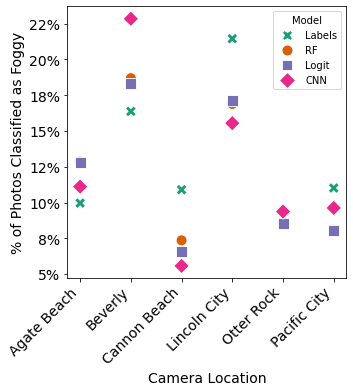

In [33]:
# Set up the figure
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(5, 5))

# Create a scatterplot
ax = sns.scatterplot(data=plot_results, x='site', y='value',
                     hue='variable', style='variable', s=120, palette = 'Dark2'
                    , markers=["X","o", "s", "D"])  # `s` is the size of the markers.

# Set x-axis labels with the specified rotation and horizontal alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title="Model").get_title().set_text('Model')# Set the label for the x-axis and specify the font size

plt.xlabel('Camera Location', fontsize=14)

plt.ylabel('% of Photos Classified as Foggy', fontsize = 14)
# plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=14)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
# Display the plot
plt.show()

In [179]:
print(np.bincount(y_pred_logit))
print(np.bincount(y_pred_rf))

[25464  5363]
[25273  5554]


In [ ]:
np.bincount(y_pred_logit)/np.bincount(y_pred_logit).sum()


array([0.89032342, 0.10967658])

In [ ]:
np.bincount(y_pred_rf)/np.bincount(y_pred_rf).sum()

array([0.88467902, 0.11532098])

In [56]:
results.loc[results['rf_pred'] == 1,'random_forest_label'] = 'Foggy (12%)'
results.loc[results['rf_pred'] == 0,'random_forest_label'] = 'Not Foggy (88%)'

results.loc[results['logit_pred'] == 1,'logistic_regression_label'] = 'Foggy (11%)'
results.loc[results['logit_pred'] == 0,'logistic_regression_label'] = 'Not Foggy (89%)'

In [57]:
barplot = results.groupby(['site','random_forest_label'])[['site','random_forest_label']].value_counts().reset_index()

plot_data = barplot.pivot(index='site', columns = 'random_forest_label', values = 0)

plot_data

random_forest_label,Foggy (12%),Not Foggy (88%)
site,,
Agate Beach,797,5392
Beverly,285,1234
Cannon Beach,468,5318
Lincoln City,994,4806
Otter Rock,473,4912
Pacific City,538,5610


<Figure size 720x432 with 0 Axes>

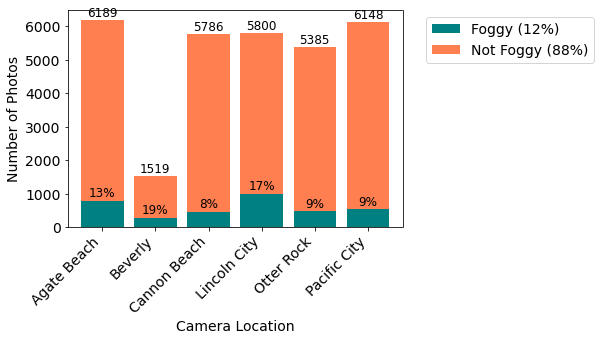

In [58]:
### stats for the site wise counts

plt.figure(figsize=(10, 6))
# Create a barplot with counts on top
# ax = sns.barplot(x='site', y=0
#                ,  palette=custom_palette
#                  , data=barplot, hue = 'Label', dodge = True)

ax = plot_data.plot(kind='bar', stacked=True, color = ['teal', 'coral'], width = 0.8)
# Add counts on top of the bars
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
lgnd = plt.legend(
    # title='Custom Label', 
                  bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 14 
                                                                   })
# Add values on top of each bar
# for p in ax.patches:
#     value = round(p.get_height())
#     ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add sum of values on top of each stacked group
for idx, value in enumerate(plot_data.sum(axis=1)):
    ax.text(idx, value + 10, f'{value}', ha='center', va='bottom', fontsize=12)

# first_stack_sum = plot_data.iloc[:, 0].sum()
for idx, value in enumerate(plot_data.iloc[:, 0]):
    percentage = (value / plot_data.iloc[idx, 0:2].sum()) * 100
    ax.text(idx, value + 30, f'{percentage:.0f}%', ha='center', va='bottom', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Camera Location', fontsize = 14)
# plt.ylim(0, 2500)
plt.ylabel('Number of Photos', fontsize = 14)
# plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=14)

# Show the plot
plt.show()


In [59]:
barplot = results.groupby(['site','logistic_regression_label'])[['site','logistic_regression_label']].value_counts().reset_index()

plot_data = barplot.pivot(index='site', columns = 'logistic_regression_label', values = 0)

plot_data

logistic_regression_label,Foggy (11%),Not Foggy (89%)
site,,
Agate Beach,796,5393
Beverly,292,1227
Cannon Beach,386,5400
Lincoln City,963,4837
Otter Rock,461,4924
Pacific City,483,5665


<Figure size 720x432 with 0 Axes>

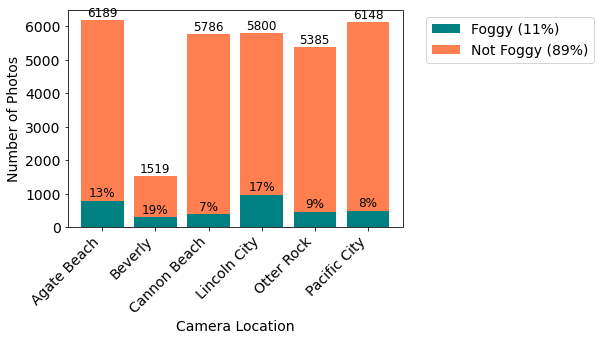

In [60]:
### stats for the site wise counts

plt.figure(figsize=(10, 6))
# Create a barplot with counts on top
# ax = sns.barplot(x='site', y=0
#                ,  palette=custom_palette
#                  , data=barplot, hue = 'Label', dodge = True)

ax = plot_data.plot(kind='bar', stacked=True, color = ['teal', 'coral'], width = 0.8)
# Add counts on top of the bars
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
lgnd = plt.legend(
    # title='Custom Label', 
                  bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 14 
                                                                   })
# Add values on top of each bar
# for p in ax.patches:
#     value = round(p.get_height())
#     ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add sum of values on top of each stacked group
for idx, value in enumerate(plot_data.sum(axis=1)):
    ax.text(idx, value + 10, f'{value}', ha='center', va='bottom', fontsize=12)

# first_stack_sum = plot_data.iloc[:, 0].sum()
for idx, value in enumerate(plot_data.iloc[:, 0]):
    percentage = (value / plot_data.iloc[idx, 0:2].sum()) * 100
    ax.text(idx, value + 30, f'{percentage:.0f}%', ha='center', va='bottom', fontsize=12)

plt.xlabel('Camera Location', fontsize = 14)
# plt.ylim(0, 2500)
plt.ylabel('Number of Photos', fontsize = 14)
# plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=14)

# Show the plot
plt.show()


In [34]:
asos = pd.read_csv('/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/datasets/oregon_coast_weather_data_2022_2023.csv')
asos['valid'] = pd.to_datetime(asos['valid'])
asos['day'] = asos.valid.dt.date

In [87]:
asos

,station,valid,lon,lat,elevation,tmpf,dwpf,relh,drct,sknt,...,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth,day
0,4S1,2022-05-01 00:15:00,-124.4249,42.4153,6.0,46.4,44.6,93.40,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,46.40,K4S1 010715Z AUTO 00000KT 7SM CLR 08/07 A3012 ...,NaN,2022-05-01
1,4S1,2022-05-01 00:35:00,-124.4249,42.4153,6.0,46.4,44.6,93.40,40.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,43.50,K4S1 010735Z AUTO 04005KT 7SM CLR 08/07 A3012 ...,NaN,2022-05-01
2,4S1,2022-05-01 00:55:00,-124.4249,42.4153,6.0,46.4,44.6,93.40,60.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,42.87,K4S1 010755Z AUTO 06006KT 7SM CLR 08/07 A3012 ...,NaN,2022-05-01
3,4S1,2022-05-01 01:15:00,-124.4249,42.4153,6.0,46.4,44.6,93.40,50.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,41.85,K4S1 010815Z AUTO 05008KT 7SM CLR 08/07 A3012 ...,NaN,2022-05-01
4,4S1,2022-05-01 01:35:00,-124.4249,42.4153,6.0,44.6,42.8,93.35,50.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,39.63,K4S1 010835Z AUTO 05008KT 7SM CLR 07/06 A3012 ...,NaN,2022-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36210,4S1,2023-10-30 22:35:00,-124.4249,42.4153,6.0,44.6,37.4,75.68,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,44.60,K4S1 310535Z AUTO 00000KT 7SM CLR 07/03 A3015 ...,NaN,2023-10-30
36211,4S1,2023-10-30 22:55:00,-124.4249,42.4153,6.0,50.0,41.0,71.07,60.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.00,K4S1 310555Z AUTO 06004KT 7SM CLR 10/05 A3015 ...,NaN,2023-10-30
36212,4S1,2023-10-30 23:15:00,-124.4249,42.4153,6.0,44.6,37.4,75.68,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,44.60,K4S1 310615Z AUTO 00000KT 7SM CLR 07/03 A3016 ...,NaN,2023-10-30
36213,4S1,2023-10-30 23:35:00,-124.4249,42.4153,6.0,48.2,41.0,76.01,200.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,47.21,K4S1 310635Z AUTO 20003KT 7SM CLR 09/05 A3016 ...,NaN,2023-10-30


In [85]:
asos.columns

Index(['station', 'valid', 'lon', 'lat', 'elevation', 'tmpf', 'dwpf', 'relh',
       'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'gust', 'skyc1',
       'skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4',
       'wxcodes', 'ice_accretion_1hr', 'ice_accretion_3hr',
       'ice_accretion_6hr', 'peak_wind_gust', 'peak_wind_drct',
       'peak_wind_time', 'feel', 'metar', 'snowdepth', 'day'],
      dtype='object')

In [86]:
asos[['station', 'lon', 'lat']].drop_duplicates()

,station,lon,lat
0,4S1,-124.4249,42.4153


In [61]:
all_desc = pd.read_csv('/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/datasets/desc_photos_for_model.csv')
all_desc['time_pst'] = pd.to_datetime(all_desc['time_pst'])
all_desc['year'] = all_desc['time_pst'].dt.year
all_desc['month'] = all_desc['time_pst'].dt.month
all_desc['day'] = all_desc['time_pst'].dt.day
all_desc['hour'] = all_desc['time_pst'].dt.hour
all_desc['minute'] = all_desc['photo'].str.slice(13,15).astype(int)
all_desc['time_pst'] = all_desc.apply(lambda row: row['time_pst'] + pd.Timedelta(minutes=row['minute']), axis=1)
results_save = results.merge(all_desc[['photo','year', 'month', 'day', 'hour', 'minute','time_pst']], on = 'photo')



In [75]:
results_save[~results_save['photo'].str.contains('AM.jpg', na=False)]

,photo,Label,site,Label_train,rf_pred,logit_pred,cnn_pred,year,month,day,hour,minute,time_pst,time_delta
22831,2022_07-04.0900_agatebeachor.jpg,not_foggy,Agate Beach,0.0,0,0,0,2022,7,4,7,0,2022-07-04 07:00:00-07:00,NaT
22835,2022_07-04.0930_agatebeachor.jpg,not_foggy,Agate Beach,0.0,0,0,0,2022,7,4,7,30,2022-07-04 07:30:00-07:00,0 days 00:30:00
4,2022_07-04.1000_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0,2022,7,4,8,0,2022-07-04 08:00:00-07:00,0 days 00:30:00
22839,2022_07-04.1030_agatebeachor.jpg,not_foggy,Agate Beach,0.0,0,0,0,2022,7,4,8,30,2022-07-04 08:30:00-07:00,0 days 00:30:00
7,2022_07-04.1100_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0,2022,7,4,9,0,2022-07-04 09:00:00-07:00,0 days 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22810,2023_09-30.1900_pacificcityor.jpg,not labeled,Pacific City,NaN,0,0,0,2023,9,30,17,0,2023-09-30 17:00:00-07:00,0 days 00:30:00
22817,2023_09-30.2000_pacificcityor.jpg,not labeled,Pacific City,NaN,0,0,0,2023,9,30,18,0,2023-09-30 18:00:00-07:00,0 days 01:00:00
22821,2023_09-30.2030_pacificcityor.jpg,not labeled,Pacific City,NaN,0,0,0,2023,9,30,18,30,2023-09-30 18:30:00-07:00,0 days 00:30:00
30000,2023_09-30.2100_pacificcityor.jpg,not_foggy,Pacific City,0.0,0,0,0,2023,9,30,19,0,2023-09-30 19:00:00-07:00,0 days 00:30:00


In [76]:
results_save=results_save[~results_save['photo'].str.contains('AM.jpg', na=False)]
results_save=results_save.sort_values(by=['site', 'time_pst'])
results_save['time_delta'] = results_save['time_pst'] - results_save.groupby(['site', 'day'])['time_pst'].shift()
##how continuous are the timeseries

In [81]:
results_save['td_count']=results_save.groupby(['time_delta'])['photo'].transform('count')

In [83]:
results_save.loc[results_save['td_count']==582]

,photo,Label,site,Label_train,rf_pred,logit_pred,cnn_pred,year,month,day,hour,minute,time_pst,time_delta,td_count
24766,2022_07-29.1430_agatebeachor.jpg,foggy,Agate Beach,0.0,0,0,1,2022,7,29,12,30,2022-07-29 12:30:00-07:00,0 days 01:00:00,582.0
2048,2022_08-01.1500_agatebeachor.jpg,not labeled,Agate Beach,NaN,1,1,1,2022,8,1,13,0,2022-08-01 13:00:00-07:00,0 days 01:00:00,582.0
2248,2022_08-03.1430_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0,2022,8,3,12,30,2022-08-03 12:30:00-07:00,0 days 01:00:00,582.0
2615,2022_08-06.1300_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0,2022,8,6,11,0,2022-08-06 11:00:00-07:00,0 days 01:00:00,582.0
2631,2022_08-06.1500_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0,2022,8,6,13,0,2022-08-06 13:00:00-07:00,0 days 01:00:00,582.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22530,2023_09-27.2030_pacificcityor.jpg,not labeled,Pacific City,NaN,0,0,0,2023,9,27,18,30,2023-09-27 18:30:00-07:00,0 days 01:00:00,582.0
22581,2023_09-28.1400_pacificcityor.jpg,not labeled,Pacific City,NaN,0,0,1,2023,9,28,12,0,2023-09-28 12:00:00-07:00,0 days 01:00:00,582.0
22598,2023_09-28.1630_pacificcityor.jpg,not labeled,Pacific City,NaN,0,0,0,2023,9,28,14,30,2023-09-28 14:30:00-07:00,0 days 01:00:00,582.0
22645,2023_09-29.1000_pacificcityor.jpg,not labeled,Pacific City,NaN,0,0,0,2023,9,29,8,0,2023-09-29 08:00:00-07:00,0 days 01:00:00,582.0


In [88]:
results_save.to_csv('/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/datasets/three_model_classifications.csv'
                   ,index=False)

In [80]:
results_save['time_delta'].value_counts()

0 days 00:30:00      28066
30 days 11:30:00       655
0 days 01:00:00        582
29 days 11:30:00       126
241 days 11:30:00      117
30 days 12:00:00        30
0 days 01:30:00         27
60 days 11:30:00        15
272 days 11:30:00       13
241 days 12:00:00       11
61 days 11:30:00        10
29 days 12:00:00         7
241 days 20:00:00        4
241 days 23:30:00        4
30 days 23:30:00         4
241 days 12:30:00        3
242 days 00:00:00        2
30 days 12:30:00         2
29 days 20:00:00         2
60 days 12:30:00         1
60 days 16:30:00         1
0 days 02:00:00          1
29 days 20:30:00         1
333 days 11:30:00        1
60 days 18:30:00         1
Name: time_delta, dtype: int64

In [70]:
results_save['time_delta'].unique()

array([            'NaT',     1800000000000,                 0,
           3600000000000,  2633400000000000,     5400000000000,
        2635200000000000, 20863800000000000, 20865600000000000,
       20867400000000000, 20907000000000000, 20894400000000000,
       23542200000000000,  2547000000000000,  2548800000000000,
        5225400000000000,  5311800000000000,  5229000000000000,
        5243400000000000,  2676600000000000, 20908800000000000,
        2637000000000000,     7200000000000,  2577600000000000,
        2579400000000000, 28812600000000000,  5250600000000000],
      dtype='timedelta64[ns]')

In [71]:
results_save.loc[results_save['time_delta'].astype(int)==0]

,photo,Label,site,Label_train,rf_pred,logit_pred,cnn_pred,year,month,day,hour,minute,time_pst,time_delta
23105,2022_07-08.0900_agatebeachor.jpg,not_foggy,Agate Beach,0.0,0,0,0,2022,7,8,7,0,2022-07-08 07:00:00-07:00,0 days
23110,2022_07-08.0930_agatebeachor.jpg,not_foggy,Agate Beach,0.0,0,0,0,2022,7,8,7,30,2022-07-08 07:30:00-07:00,0 days
23115,2022_07-08.1000_agatebeachor 11.48.53 AM.jpg,not_foggy,Agate Beach,0.0,0,0,0,2022,7,8,8,0,2022-07-08 08:00:00-07:00,0 days
258,2022_07-08.1030_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0,2022,7,8,8,30,2022-07-08 08:30:00-07:00,0 days
23127,2022_07-08.1100_agatebeachor 11.48.53 AM.jpg,not_foggy,Agate Beach,0.0,0,0,0,2022,7,8,9,0,2022-07-08 09:00:00-07:00,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23219,2022_07-08.1930_pacificcityor.jpg,not_foggy,Pacific City,0.0,0,0,0,2022,7,8,17,30,2022-07-08 17:30:00-07:00,0 days
23226,2022_07-08.2000_pacificcityor.jpg,not_foggy,Pacific City,0.0,0,0,0,2022,7,8,18,0,2022-07-08 18:00:00-07:00,0 days
358,2022_07-08.2030_pacificcityor.jpg,not labeled,Pacific City,NaN,0,0,0,2022,7,8,18,30,2022-07-08 18:30:00-07:00,0 days
23233,2022_07-08.2100_pacificcityor.jpg,not_foggy,Pacific City,0.0,0,0,0,2022,7,8,19,0,2022-07-08 19:00:00-07:00,0 days


In [72]:
results_save.loc[(results_save['site']=='Agate Beach') & (results_save['month']==7) & (results_save['day']==8)]

,photo,Label,site,Label_train,rf_pred,logit_pred,cnn_pred,year,month,day,hour,minute,time_pst,time_delta
245,2022_07-08.0900_agatebeachor 11.48.53 AM.jpg,not labeled,Agate Beach,NaN,0,0,0,2022,7,8,7,0,2022-07-08 07:00:00-07:00,NaT
23105,2022_07-08.0900_agatebeachor.jpg,not_foggy,Agate Beach,0.0,0,0,0,2022,7,8,7,0,2022-07-08 07:00:00-07:00,0 days 00:00:00
23109,2022_07-08.0930_agatebeachor 11.48.53 AM.jpg,not_foggy,Agate Beach,0.0,0,0,0,2022,7,8,7,30,2022-07-08 07:30:00-07:00,0 days 00:30:00
23110,2022_07-08.0930_agatebeachor.jpg,not_foggy,Agate Beach,0.0,0,0,0,2022,7,8,7,30,2022-07-08 07:30:00-07:00,0 days 00:00:00
255,2022_07-08.1000_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0,2022,7,8,8,0,2022-07-08 08:00:00-07:00,0 days 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14874,2023_07-08.1930_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0,2023,7,8,17,30,2023-07-08 17:30:00-07:00,0 days 00:30:00
14878,2023_07-08.2000_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0,2023,7,8,18,0,2023-07-08 18:00:00-07:00,0 days 00:30:00
14882,2023_07-08.2030_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0,2023,7,8,18,30,2023-07-08 18:30:00-07:00,0 days 00:30:00
14885,2023_07-08.2100_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0,2023,7,8,19,0,2023-07-08 19:00:00-07:00,0 days 00:30:00


In [43]:
onp = asos.loc[(asos['station'].isin(['ONP','TMK'])) & (asos['valid'] >= '2022-01-01')]
# onp = asos.loc[(asos['station'] == 'ONP') & (asos['valid'] >= '2022-01-01')]

In [44]:
onp

,station,valid,lon,lat,elevation,tmpf,dwpf,relh,drct,sknt,...,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth,day
1015609,ONP,2022-01-01 00:15:00,-124.0579,44.5804,48.0,42.8,32.0,65.38,360.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,40.03,KONP 010015Z AUTO 36004KT 10SM BKN036 BKN043 0...,NaN,2022-01-01
1015610,TMK,2022-01-01 00:15:00,-123.8144,45.4182,11.0,39.2,30.2,69.88,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,39.20,KTMK 010015Z AUTO 00000KT 10SM CLR 04/M01 A300...,NaN,2022-01-01
1015611,ONP,2022-01-01 00:35:00,-124.0579,44.5804,48.0,39.2,30.2,69.88,350.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,34.95,KONP 010035Z AUTO 35005KT 10SM SCT036 SCT043 0...,NaN,2022-01-01
1015612,TMK,2022-01-01 00:35:00,-123.8144,45.4182,11.0,37.4,30.2,74.98,50.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,33.73,KTMK 010035Z AUTO 05004KT 10SM CLR 03/M01 A300...,NaN,2022-01-01
1015613,TMK,2022-01-01 00:50:00,-123.8144,45.4182,11.0,35.6,30.2,80.51,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,35.60,KTMK 010050Z AUTO 00000KT 10SM CLR 02/M01 A300...,NaN,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072622,TMK,2023-02-25 22:30:00,-123.8144,45.4182,11.0,41.0,30.2,65.16,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,41.00,KTMK 252230Z AUTO 00000KT 10SM CLR 05/M01 A298...,NaN,2023-02-25
1072623,TMK,2023-02-25 22:50:00,-123.8144,45.4182,11.0,41.0,32.0,70.08,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,41.00,KTMK 252250Z AUTO 00000KT 10SM CLR 05/00 A2983...,NaN,2023-02-25
1072624,TMK,2023-02-25 23:10:00,-123.8144,45.4182,11.0,41.0,30.2,65.16,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,41.00,KTMK 252310Z AUTO 00000KT 10SM CLR 05/M01 A298...,NaN,2023-02-25
1072625,TMK,2023-02-25 23:30:00,-123.8144,45.4182,11.0,41.0,32.0,70.08,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,41.00,KTMK 252330Z AUTO 00000KT 10SM CLR 05/00 A2981...,NaN,2023-02-25


In [45]:
onp = onp[['station','valid','vsby', 'relh' ]]

In [46]:
original_timezone = pytz.timezone('US/Pacific')

# # # Convert to Pacific Time
# pacific_timezone = pytz.timezone('US/Pacific')
# onp['time_pst'] = onp['valid'].dt.tz_localize(original_timezone).dt.tz_convert(pacific_timezone)


onp['year'] = onp['time_pst'].dt.year
onp['month'] = onp['time_pst'].dt.month
onp['day'] = onp['time_pst'].dt.day
onp['hour_pst'] = onp['time_pst'].dt.hour
onp['fog_binary'] = (onp['vsby'] < 0.62)*1



/tmp/ipykernel_2978262/720221527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_2978262/720221527.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_2978262/720221527.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_2978

In [66]:
tt = all_desc.groupby(['photo', 'year', 'month', 'day', 'hour_pst']).value_counts().reset_index()
tt.loc[tt[0]>1]

,photo,year,month,day,hour_pst,Label,hour_central,site,time,time_pst,0


In [47]:
onp['min_time_filter'] = onp.groupby(['year', 'month', 'day', 'hour_pst',])['time_pst'].transform('min')
onp['max_fog_binary'] = onp.groupby(['year', 'month', 'day', 'hour_pst'])['fog_binary'].transform('max')
onp_merge = onp.loc[onp['time_pst'] == onp['min_time_filter']]
onp_merge

/tmp/ipykernel_2978262/1281654849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_2978262/1281654849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,station,valid,vsby,relh,time_pst,year,month,day,hour_pst,fog_binary,min_time_filter,max_fog_binary
1015609,ONP,2022-01-01 00:15:00,10.0,65.38,2021-12-31 16:15:00-08:00,2021,12,31,16,0,2021-12-31 16:15:00-08:00,0
1015610,TMK,2022-01-01 00:15:00,10.0,69.88,2021-12-31 16:15:00-08:00,2021,12,31,16,0,2021-12-31 16:15:00-08:00,0
1015615,TMK,2022-01-01 01:10:00,10.0,80.51,2021-12-31 17:10:00-08:00,2021,12,31,17,0,2021-12-31 17:10:00-08:00,0
1015621,TMK,2022-01-01 02:15:00,10.0,100.00,2021-12-31 18:15:00-08:00,2021,12,31,18,0,2021-12-31 18:15:00-08:00,0
1015622,ONP,2022-01-01 02:15:00,10.0,93.03,2021-12-31 18:15:00-08:00,2021,12,31,18,0,2021-12-31 18:15:00-08:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1072609,TMK,2023-02-25 19:10:00,10.0,92.97,2023-02-25 11:10:00-08:00,2023,2,25,11,0,2023-02-25 11:10:00-08:00,0
1072613,TMK,2023-02-25 20:10:00,10.0,74.98,2023-02-25 12:10:00-08:00,2023,2,25,12,0,2023-02-25 12:10:00-08:00,0
1072616,TMK,2023-02-25 21:10:00,10.0,74.98,2023-02-25 13:10:00-08:00,2023,2,25,13,0,2023-02-25 13:10:00-08:00,0
1072620,TMK,2023-02-25 22:10:00,10.0,69.88,2023-02-25 14:10:00-08:00,2023,2,25,14,0,2023-02-25 14:10:00-08:00,0


In [70]:
# onp_merge.loc[onp_merge['fog_binary']!= onp_merge['max_fog_binary']]

In [42]:
results.loc[results['rf_pred'] == 1,'rf_label'] = 'Foggy'
results.loc[results['rf_pred'] == 0,'rf_label'] = 'Not Foggy'

results.loc[results['logit_pred'] == 1,'logit_label'] = 'Foggy'
results.loc[results['logit_pred'] == 0,'logit_label'] = 'Not Foggy'

results.loc[results['cnn_pred'] == 1,'cnn_label'] = 'Foggy'
results.loc[results['cnn_pred'] == 0,'cnn_label'] = 'Not Foggy'

agate = results.loc[results['site']=='Agate Beach']
agate

,photo,Label,site,Label_train,rf_pred,logit_pred,cnn_pred,rf_label,logit_label,cnn_label
4,2022_07-04.1000_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0,Not Foggy,Not Foggy,Not Foggy
7,2022_07-04.1100_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0,Not Foggy,Not Foggy,Not Foggy
12,2022_07-04.1200_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0,Not Foggy,Not Foggy,Not Foggy
15,2022_07-04.1230_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0,Not Foggy,Not Foggy,Not Foggy
21,2022_07-04.1330_agatebeachor.jpg,not labeled,Agate Beach,NaN,0,0,0,Not Foggy,Not Foggy,Not Foggy
...,...,...,...,...,...,...,...,...,...,...
30806,2023_09-30.1200_agatebeachor.jpg,not_foggy,Agate Beach,0.0,0,0,0,Not Foggy,Not Foggy,Not Foggy
30817,2023_09-30.1600_agatebeachor.jpg,not_foggy,Agate Beach,0.0,0,0,0,Not Foggy,Not Foggy,Not Foggy
30818,2023_09-30.1630_agatebeachor.jpg,not_foggy,Agate Beach,0.0,0,0,0,Not Foggy,Not Foggy,Not Foggy
30821,2023_09-30.1800_agatebeachor.jpg,not_foggy,Agate Beach,0.0,0,0,0,Not Foggy,Not Foggy,Not Foggy


In [49]:
compare = agate.merge(all_desc[['photo','year', 'month', 'day', 'hour_pst']], on = 'photo')
compare = compare.merge(onp_merge, on = ['year', 'month', 'day', 'hour_pst'])

In [50]:
compare['accuarcy_rf'] = (compare['rf_pred'] == compare['fog_binary'])*1
compare['accuarcy_logit'] = (compare['logit_pred'] == compare['fog_binary'])*1
compare['accuarcy_cnn'] = (compare['cnn_pred'] == compare['fog_binary'])*1
compare['accuarcy_labels'] = (compare['Label_train'] == compare['fog_binary'])*1
compare.loc[compare['Label_train'].isna(), 'accuarcy_labels'] = np.nan

In [51]:
print(compare['accuarcy_rf'].mean())
print(compare['accuarcy_logit'].mean())
print(compare['accuarcy_cnn'].mean())
print(compare['accuarcy_labels'].mean())


0.7755847953216374
0.7602339181286549
0.7819200779727096
0.8417985012489592


In [259]:
print(compare['accuarcy_rf'].mean())
print(compare['accuarcy_logit'].mean())
print(compare['accuarcy_labels'].mean())
###values with old labels and model
# 0.6625766871165644
# 0.6290703161868806
# 0.7597402597402597


0.6625766871165644
0.6290703161868806
0.7597402597402597


In [55]:
del results['airport']

In [56]:
results.loc[results['site'].isin(['Agate Beach', 'Otter Rock', 'Beverly', 'Lincoln City']), 'station'] = 'ONP'
results.loc[results['site'].isin(['Pacific City', 'Cannon Beach']), 'station'] = 'TMK'

In [59]:
results = results.merge(all_desc[['photo','year', 'month', 'day', 'hour_pst']], on = 'photo')


In [63]:
stream_data = results.merge(onp_merge, on = ['year', 'month', 'day', 'hour_pst','station']
,how='left')

In [65]:
len(stream_data.loc[(stream_data['year']==2022) & (stream_data['valid'].isna())])

680

In [66]:
len(stream_data.loc[(stream_data['year']==2022)])

12176

In [71]:
stream_data['photo'].nunique()
stream_data.to_csv('/home/smmrrr/Fog_Imaging_Project/Fog_Project_Code/stream_data.csv')

In [60]:
len(results)

30001

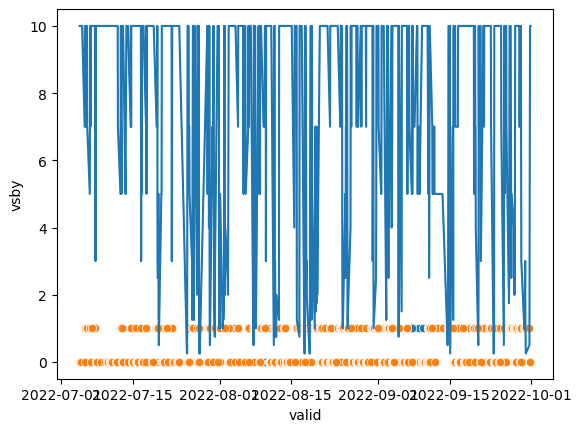

In [265]:
plt_data = compare.loc[compare['valid'].between('2022-06-01', '2022-10-01')].reset_index()

ax = sns.lineplot(x = 'valid', y = 'vsby', data = plt_data)
tt = sns.scatterplot(x = 'valid', y = 'rf_pred', data = plt_data)
tt2 = sns.scatterplot(x = 'valid', y = 'logit_pred', data = plt_data)

In [76]:
plt_data = compare.loc[compare['valid'].between('2022-07-01', '2022-09-01')].reset_index()
plt_data['relh'] = plt_data['relh']/100
plt_data.loc[plt_data['rf_pred'] == 0, 'rf_pred'] = np.nan
plt_data.loc[plt_data['rf_pred'] == 1, 'rf_pred'] = 1.025
plt_data.loc[plt_data['logit_pred'] == 0, 'logit_pred'] = np.nan
plt_data.loc[plt_data['logit_pred'] == 1, 'logit_pred'] = 1.05
plt_data.loc[plt_data['Label_train'] == 0, 'Label_train'] = np.nan


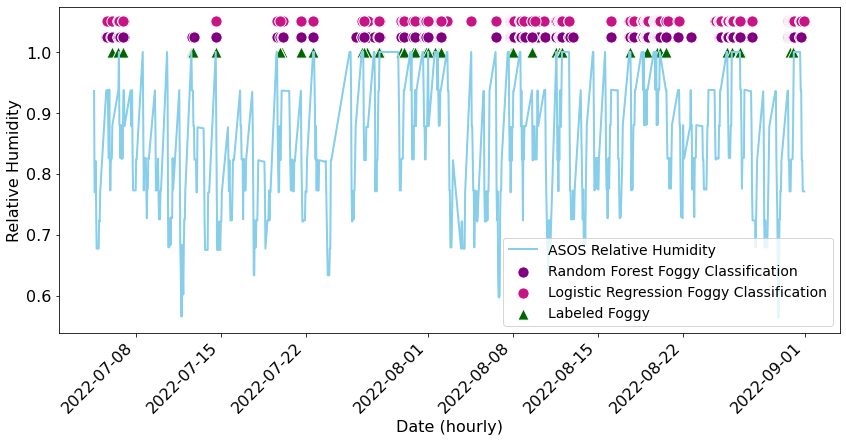

In [77]:
plt.figure(figsize=(14, 6)) 
ax = sns.lineplot(x = 'valid', y = 'relh', data = plt_data
                 , label='ASOS Relative Humidity', color='skyblue', lw = 2)
tt = sns.scatterplot(x = 'valid', y = 'rf_pred', data = plt_data
                   , label='Random Forest Foggy Classification', color='purple', s = 125 )
t1 = sns.scatterplot(x = 'valid', y = 'logit_pred', data = plt_data
                   , label='Logistic Regression Foggy Classification', color='mediumvioletred', s = 125 )
t2 = sns.scatterplot(x = 'valid', y = 'Label_train', data = plt_data
                   , label='Labeled Foggy', color='darkgreen' , marker='^', s = 125)
# tt2 = sns.scatterplot(x = 'valid', y = 'logit_pred', data = plt_data)
plt.xlabel('Date (hourly)', fontsize = 16)
# plt.ylim(0, 2500)
plt.ylabel('Relative Humidity', fontsize = 16)
# plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=16)
plt.xticks(rotation=45, ha='right')  # 'ha' stands for horizontal alignment
plt.legend(fontsize=14)

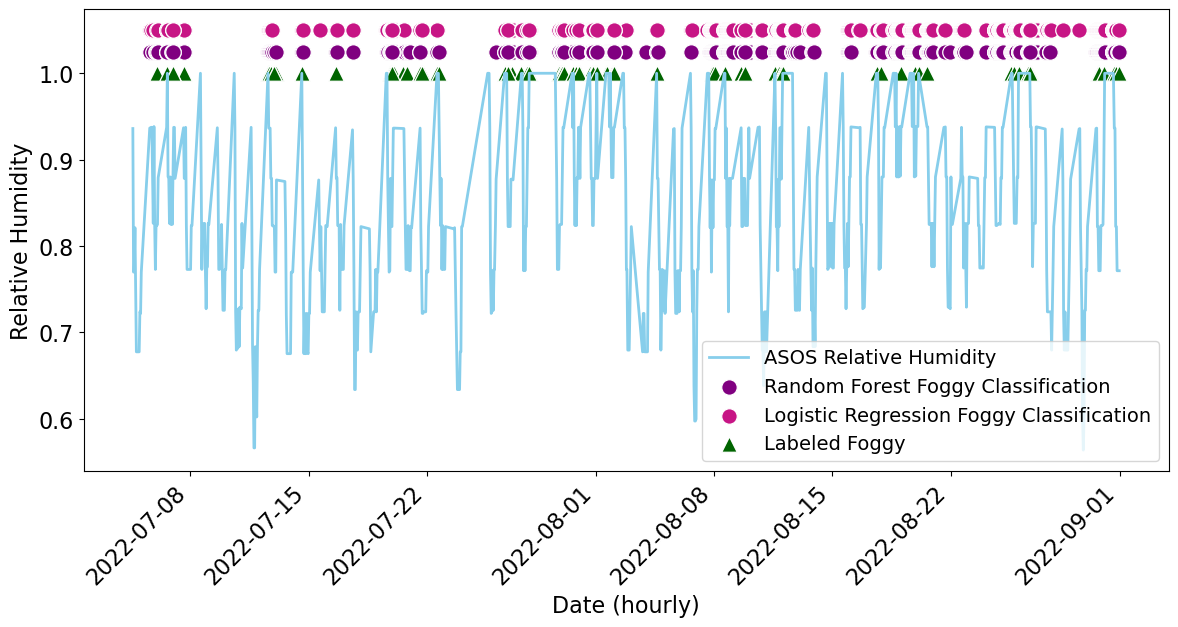

In [283]:
plt.figure(figsize=(14, 6)) 
ax = sns.lineplot(x = 'valid', y = 'relh', data = plt_data
                 , label='ASOS Relative Humidity', color='skyblue', lw = 2)
tt = sns.scatterplot(x = 'valid', y = 'rf_pred', data = plt_data
                   , label='Random Forest Foggy Classification', color='purple', s = 125 )
t1 = sns.scatterplot(x = 'valid', y = 'logit_pred', data = plt_data
                   , label='Logistic Regression Foggy Classification', color='mediumvioletred', s = 125 )
t2 = sns.scatterplot(x = 'valid', y = 'Label_train', data = plt_data
                   , label='Labeled Foggy', color='darkgreen' , marker='^', s = 125)
# tt2 = sns.scatterplot(x = 'valid', y = 'logit_pred', data = plt_data)
plt.xlabel('Date (hourly)', fontsize = 16)
# plt.ylim(0, 2500)
plt.ylabel('Relative Humidity', fontsize = 16)
# plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=16)
plt.xticks(rotation=45, ha='right')  # 'ha' stands for horizontal alignment
plt.legend(fontsize=14)

In [78]:
plt_data = compare.loc[compare['valid'].between('2022-07-01', '2022-09-01')].reset_index()
plt_data['vsby'] = plt_data['vsby']/1.60934
plt_data.loc[plt_data['rf_pred'] == 0, 'rf_pred'] = np.nan
plt_data.loc[plt_data['rf_pred'] == 1, 'rf_pred'] = .5
plt_data.loc[plt_data['logit_pred'] == 0, 'logit_pred'] = np.nan
plt_data.loc[plt_data['logit_pred'] == 1, 'logit_pred'] = .25
plt_data.loc[plt_data['Label_train'] == 0, 'Label_train'] = np.nan
plt_data.loc[plt_data['Label_train'] == 1, 'Label_train'] = 0


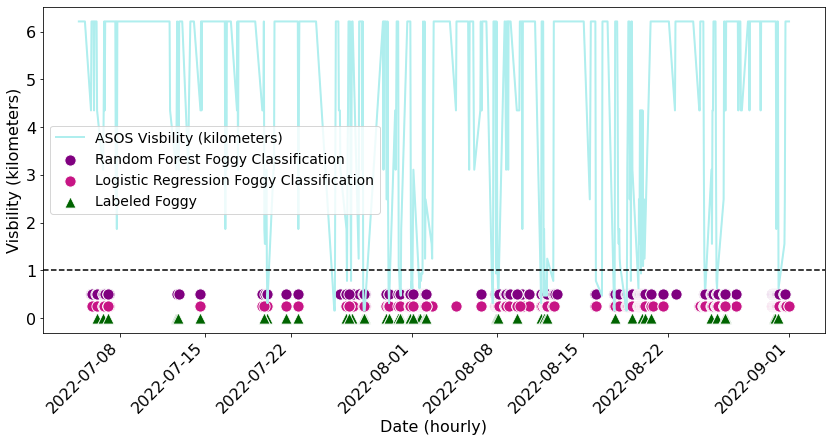

In [79]:
plt.figure(figsize=(14, 6)) 
ax = sns.lineplot(x = 'valid', y = 'vsby', data = plt_data
                 , label='ASOS Visbility (kilometers)', color='paleturquoise', lw = 2)
tt = sns.scatterplot(x = 'valid', y = 'rf_pred', data = plt_data
                   , label='Random Forest Foggy Classification', color='purple', s = 125 )
t1 = sns.scatterplot(x = 'valid', y = 'logit_pred', data = plt_data
                   , label='Logistic Regression Foggy Classification', color='mediumvioletred', s = 125 )
t2 = sns.scatterplot(x = 'valid', y = 'Label_train', data = plt_data
                   , label='Labeled Foggy', color='darkgreen' , marker='^', s = 125)
# tt2 = sns.scatterplot(x = 'valid', y = 'logit_pred', data = plt_data)
plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('Date (hourly)', fontsize = 16)
# plt.ylim(0, 2500)
plt.ylabel('Visbility (kilometers)', fontsize = 16)
# plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=16)
plt.xticks(rotation=45, ha='right')  # 'ha' stands for horizontal alignment
plt.legend(fontsize=14)

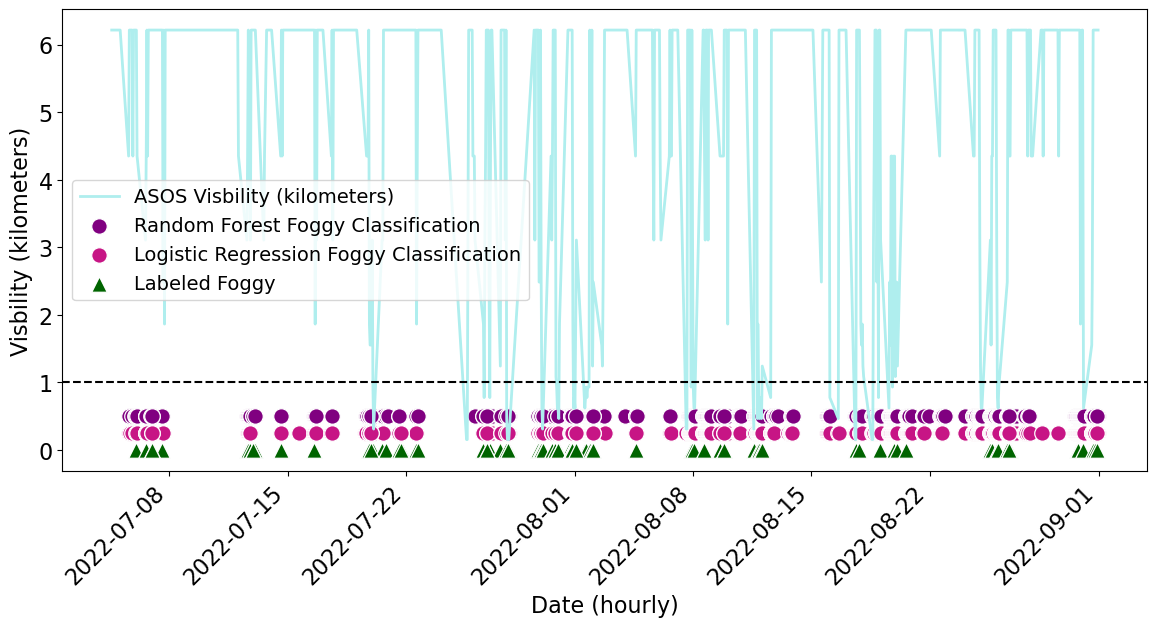

In [300]:
plt.figure(figsize=(14, 6)) 
ax = sns.lineplot(x = 'valid', y = 'vsby', data = plt_data
                 , label='ASOS Visbility (kilometers)', color='paleturquoise', lw = 2)
tt = sns.scatterplot(x = 'valid', y = 'rf_pred', data = plt_data
                   , label='Random Forest Foggy Classification', color='purple', s = 125 )
t1 = sns.scatterplot(x = 'valid', y = 'logit_pred', data = plt_data
                   , label='Logistic Regression Foggy Classification', color='mediumvioletred', s = 125 )
t2 = sns.scatterplot(x = 'valid', y = 'Label_train', data = plt_data
                   , label='Labeled Foggy', color='darkgreen' , marker='^', s = 125)
# tt2 = sns.scatterplot(x = 'valid', y = 'logit_pred', data = plt_data)
plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('Date (hourly)', fontsize = 16)
# plt.ylim(0, 2500)
plt.ylabel('Visbility (kilometers)', fontsize = 16)
# plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=16)
plt.xticks(rotation=45, ha='right')  # 'ha' stands for horizontal alignment
plt.legend(fontsize=14)

In [284]:
plt_data = compare.loc[compare['valid'].between('2023-07-01', '2023-09-01')].reset_index()
plt_data['relh'] = plt_data['relh']/100
plt_data.loc[plt_data['rf_pred'] == 0, 'rf_pred'] = np.nan
plt_data.loc[plt_data['rf_pred'] == 1, 'rf_pred'] = 1.025
plt_data.loc[plt_data['logit_pred'] == 0, 'logit_pred'] = np.nan
plt_data.loc[plt_data['logit_pred'] == 1, 'logit_pred'] = 1.05
plt_data.loc[plt_data['Label_train'] == 0, 'Label_train'] = np.nan


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


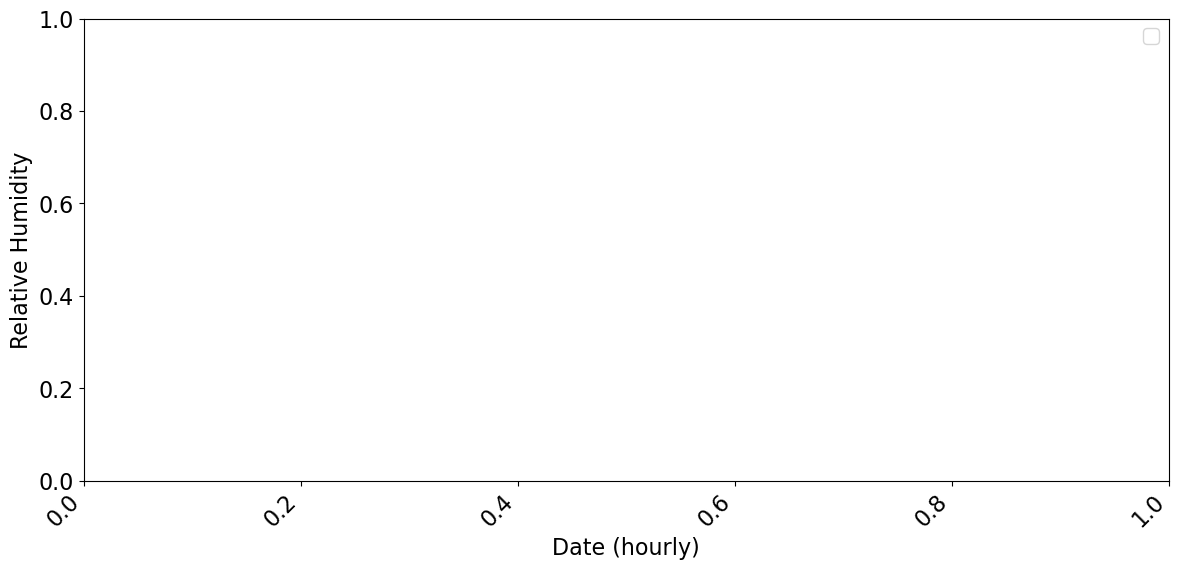

In [285]:
plt.figure(figsize=(14, 6)) 
ax = sns.lineplot(x = 'valid', y = 'relh', data = plt_data
                 , label='ASOS Relative Humidity', color='skyblue', lw = 2)
tt = sns.scatterplot(x = 'valid', y = 'rf_pred', data = plt_data
                   , label='Random Forest Foggy Classification', color='purple', s = 125 )
t1 = sns.scatterplot(x = 'valid', y = 'logit_pred', data = plt_data
                   , label='Logistic Regression Foggy Classification', color='mediumvioletred', s = 125 )
t2 = sns.scatterplot(x = 'valid', y = 'Label_train', data = plt_data
                   , label='Labeled Foggy', color='darkgreen' , marker='^', s = 125)
# tt2 = sns.scatterplot(x = 'valid', y = 'logit_pred', data = plt_data)
plt.xlabel('Date (hourly)', fontsize = 16)
# plt.ylim(0, 2500)
plt.ylabel('Relative Humidity', fontsize = 16)
# plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=16)
plt.xticks(rotation=45, ha='right')  # 'ha' stands for horizontal alignment
plt.legend(fontsize=14)